# Netflix Data Analysis
von Daniel Henke & Stefanie Wenzel

### Daten importieren und aufräumen

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
df = pd.read_csv('./data/netflix-rotten-tomatoes-metacritic-imdb.csv')
df=df.drop(columns=["Image", "Poster", "TMDb Trailer", "Trailer Site", "Netflix Link", "IMDb Link", 'Summary', "Writer", "Genre", "Tags", "Hidden Gem Score", "Runtime", "Actors", "View Rating", "Netflix Release Date", "Production House", "IMDb Votes"])
df

,Title,Languages,Series or Movie,Country Availability,Director,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date
0,Lets Fight Ghost,"Swedish, Spanish",Series,Thailand,Tomas Alfredson,7.9,98.0,82.0,74.0,57.0,"$2,122,065",12 Dec 2008
1,HOW TO BUILD A GIRL,English,Movie,Canada,Coky Giedroyc,5.8,79.0,69.0,1.0,NaN,"$70,632",08 May 2020
2,Centigrade,English,Movie,Canada,Brendan Walsh,4.3,NaN,46.0,NaN,NaN,"$16,263",28 Aug 2020
3,ANNE+,Turkish,Series,"Belgium,Netherlands",NaN,6.5,NaN,NaN,1.0,NaN,NaN,01 Oct 2016
4,Moxie,English,Movie,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",Stephen Irwin,6.3,NaN,NaN,NaN,4.0,NaN,22 Sep 2011
...,...,...,...,...,...,...,...,...,...,...,...,...
15475,K-POP Extreme Survival,NaN,Series,"South Korea,Argentina,United Kingdom,Australia...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15476,DreamWorks Shreks Swamp Stories,NaN,Series,"Russia,Hong Kong,Hungary,Australia,South Korea...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15477,DreamWorks Happy Holidays from Madagascar,English,Series,"Belgium,Switzerland,United States,Germany,Unit...",NaN,6.8,NaN,NaN,NaN,NaN,NaN,NaN
15478,DreamWorks Holiday Classics,English,Series,"Belgium,Switzerland,Germany,Argentina,United K...",NaN,6.4,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
# Kategorisieren
df['Release Date'] = pd.to_datetime(df['Release Date'], format = '%d %b %Y')

# Dollarzeichen und Komma entfernen
Boxoffice = df['Boxoffice']

df['Boxoffice'] = df['Boxoffice'].replace({r'\$' : ''}, regex = True)

df['Boxoffice'] = df['Boxoffice'].replace({r'\,' : ''}, regex = True)

df['Boxoffice'] = pd.to_numeric(df['Boxoffice'])


def funct(x):
   if x=="leer":
       return None
   else:
       return len(x.split(","))
       
       
for c in ["Languages", "Country Availability"]:
    df[c]=df[c].fillna("leer")
    df[c]=df[c].apply(funct)

df


,Title,Languages,Series or Movie,Country Availability,Director,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date
0,Lets Fight Ghost,2.0,Series,1.0,Tomas Alfredson,7.9,98.0,82.0,74.0,57.0,2122065.0,2008-12-12
1,HOW TO BUILD A GIRL,1.0,Movie,1.0,Coky Giedroyc,5.8,79.0,69.0,1.0,NaN,70632.0,2020-05-08
2,Centigrade,1.0,Movie,1.0,Brendan Walsh,4.3,NaN,46.0,NaN,NaN,16263.0,2020-08-28
3,ANNE+,1.0,Series,2.0,NaN,6.5,NaN,NaN,1.0,NaN,NaN,2016-10-01
4,Moxie,1.0,Movie,36.0,Stephen Irwin,6.3,NaN,NaN,NaN,4.0,NaN,2011-09-22
...,...,...,...,...,...,...,...,...,...,...,...,...
15475,K-POP Extreme Survival,NaN,Series,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
15476,DreamWorks Shreks Swamp Stories,NaN,Series,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
15477,DreamWorks Happy Holidays from Madagascar,1.0,Series,35.0,NaN,6.8,NaN,NaN,NaN,NaN,NaN,NaT
15478,DreamWorks Holiday Classics,1.0,Series,35.0,NaN,6.4,NaN,NaN,NaN,NaN,NaN,NaT


In [96]:
# fehlende Werte abfragen
print(df.isnull().sum())

for i in df.columns:
    missing_percentage = 100 * df[i].isna().sum()/len(df)
    print('{} missing value percentage: {}%'.format(i, round(missing_percentage, 2)))

Title                        0
Languages                 1935
Series or Movie              0
Country Availability        19
Director                  4708
IMDb Score                2099
Rotten Tomatoes Score     9098
Metacritic Score         11144
Awards Received           9405
Awards Nominated For      7819
Boxoffice                11473
Release Date              2107
dtype: int64
Title missing value percentage: 0.0%
Languages missing value percentage: 12.5%
Series or Movie missing value percentage: 0.0%
Country Availability missing value percentage: 0.12%
Director missing value percentage: 30.41%
IMDb Score missing value percentage: 13.56%
Rotten Tomatoes Score missing value percentage: 58.77%
Metacritic Score missing value percentage: 71.99%
Awards Received missing value percentage: 60.76%
Awards Nominated For missing value percentage: 50.51%
Boxoffice missing value percentage: 74.11%
Release Date missing value percentage: 13.61%


### Filme vs Serien

In [97]:
MvsS = df.groupby("Series or Movie").mean()
MvsS

,Languages,Country Availability,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice
Series or Movie,,,,,,,,
Movie,1.487903,10.820407,6.310101,59.456687,56.753647,8.997181,13.834328,4.542950e+07
Series,1.269415,18.306695,7.111465,61.770492,59.779070,7.721119,14.614227,5.734661e+07


### Release Year

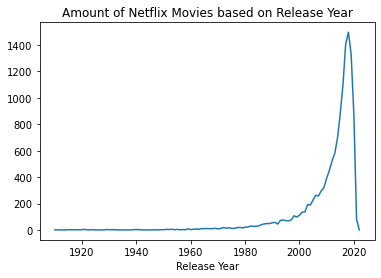

In [98]:
def funct(x):
    return x.year

TimeVsLanguage = df
TimeVsLanguage["Release Date"] = TimeVsLanguage["Release Date"].apply(funct).dropna()
Time=TimeVsLanguage.groupby("Release Date").size()
TimeVsLanguage= TimeVsLanguage.groupby("Release Date").mean()

plt.title("Amount of Netflix Movies based on Release Year")
plt.xlabel("Release Year")
plt.plot(Time)

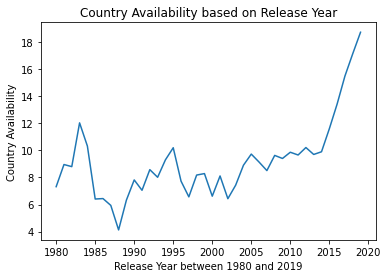

In [110]:
TimeVsCountry=TimeVsLanguage[TimeVsLanguage.index>1979]
TimeVsCountry=TimeVsCountry[TimeVsCountry.index<2020]
plt.title("Country Availability based on Release Year")
plt.xlabel("Release Year between 1980 and 2019")
plt.ylabel("Country Availability")
plt.plot(TimeVsCountry.index, TimeVsCountry["Country Availability"])

### Countries & Languages

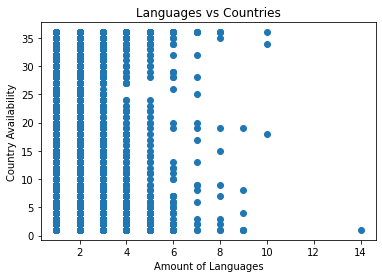

In [99]:
plt.title("Languages vs Countries")
plt.xlabel("Amount of Languages")
plt.ylabel("Country Availability")
plt.scatter(df["Languages"], df["Country Availability"])

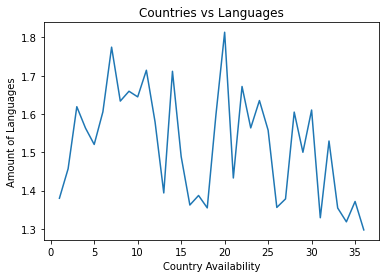

In [111]:
ContCount = df.groupby("Country Availability").mean()
plt.title("Countries vs Languages")
plt.ylabel("Amount of Languages")
plt.xlabel("Country Availability")
plt.plot(ContCount.index, ContCount["Languages"])

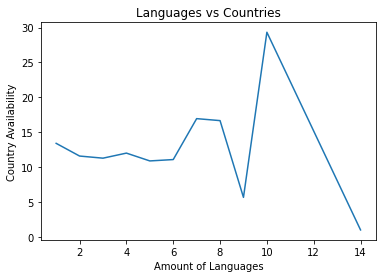

In [112]:
LangCount = df.groupby("Languages").mean()
plt.title("Languages vs Countries")
plt.xlabel("Amount of Languages")
plt.ylabel("Country Availability")
plt.plot(LangCount.index, LangCount["Country Availability"])


### IMDb Score

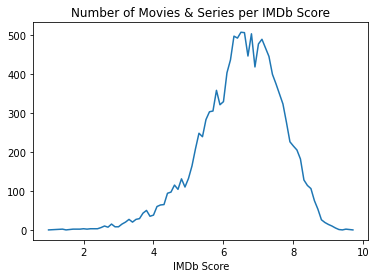

In [102]:
counter = df.groupby("IMDb Score").size()
plt.title("Number of Movies & Series per IMDb Score")
plt.xlabel("IMDb Score")
plt.plot(counter)


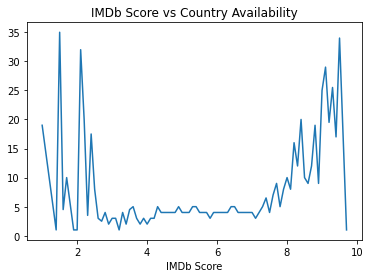

In [103]:
ScorevsCountry = df.groupby("IMDb Score").median()
plt.title("IMDb Score vs Country Availability")
plt.xlabel("IMDb Score")
plt.plot(ScorevsCountry.index, ScorevsCountry["Country Availability"])

### Best Director

In [105]:
# Welcher Direktor macht die besten Filme?

DirectorVsTitle = df[['Director', 'Title']]

DirectorVsTitle = DirectorVsTitle.groupby('Director').size()

DirectorVsTitle


Director
A. Rajdeep          1
A. Salaam           1
A.L. Vijay          2
A.R. Murugadoss     3
Aamir Bashir        1
                   ..
Óscar Menéndez      1
Ömer Faruk Sorak    2
Ömer Ugur           2
Ömer Vargi          1
Özcan Deniz         1
Length: 6746, dtype: int64

In [113]:

# Director vs. IMDb Score
DirectorVsIMDb = df[['Director', 'IMDb Score', "Boxoffice"]]

DirectorVsIMDb = DirectorVsIMDb.groupby('Director').mean()

DirectorVsIMDb.sort_values('IMDb Score', ascending =False)


,IMDb Score,Boxoffice
Director,,
Dorin Marcu,9.7,NaN
Fernando Escovar,9.2,NaN
"Bill Butler, William A. Graham",9.1,NaN
Rosa Russo,9.1,NaN
Ignacio Busquier,9.0,NaN
...,...,...
Yu Nakamoto,NaN,NaN
Yutaka Tsuchida,NaN,NaN
Yûgo Sakamoto,NaN,NaN


In [115]:

# Merge
Merge = pd.concat([DirectorVsTitle, DirectorVsIMDb], axis = 1, join ='inner')
Merge=Merge.rename(columns={0:"Amount of Movies"})

# Bedingung für DirectorVsIMDb, ab 3 Titeln
Merge = Merge[Merge["Amount of Movies"]>2].sort_values('IMDb Score', ascending =False)

Merge[["Amount of Movies", "IMDb Score"]].head(20)

,Amount of Movies,IMDb Score
Director,,
Christopher Nolan,8,8.462500
Sergio Leone,3,8.433333
Frank Darabont,3,8.333333
Quentin Tarantino,8,8.250000
Stan Lathan,3,8.233333
Stanley Kubrick,5,8.140000
Archie Baron,3,8.100000
Yasujirô Ozu,3,8.100000
S.S. Rajamouli,7,8.085714


In [116]:
Merge.sort_values('Boxoffice', ascending =False).head(20)

,Amount of Movies,IMDb Score,Boxoffice
Director,,,
George Lucas,14,6.578571,4.151409e+08
Joss Whedon,3,7.700000,3.692928e+08
Patty Jenkins,3,7.366667,2.867000e+08
Andy Muschietti,8,7.062500,2.820243e+08
David Yates,8,7.387500,2.717577e+08
Christopher Nolan,8,8.462500,2.423527e+08
Francis Lawrence,6,6.916667,2.371286e+08
Colin Trevorrow,3,6.866667,2.203005e+08
Jake Kasdan,4,6.050000,2.159229e+08


### Geld vs Gut

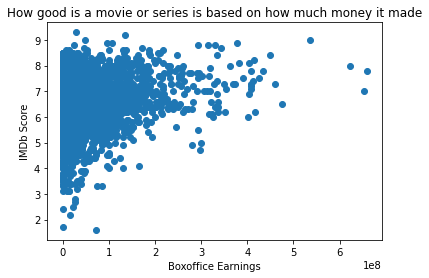

In [108]:
MoneyVsGood=df
MoneyVsGood["Boxoffice"]=MoneyVsGood["Boxoffice"].dropna()
Money=MoneyVsGood.groupby("Boxoffice").mean()
plt.title("How good is a movie or series is based on how much money it made")
plt.xlabel("Boxoffice Earnings")
plt.ylabel("IMDb Score")
plt.scatter(Money.index, Money["IMDb Score"])

Text(0.5, 1.0, 'Boxoffice Earnings based on IMDb Score')

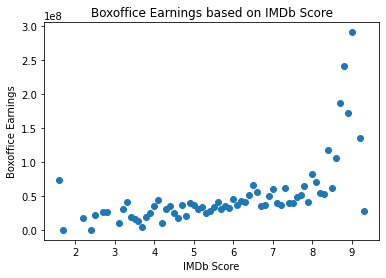

In [109]:
Good=MoneyVsGood.groupby("IMDb Score").mean()
plt.scatter(Good.index, Good["Boxoffice"])
plt.ylabel("Boxoffice Earnings")
plt.xlabel("IMDb Score")
plt.title("Boxoffice Earnings based on IMDb Score")